<font size="7">**Esmeralda output review**</font>

<font size="4">This notebook serves as documentation for esmeralda output
1. Summary/Events is per event summary
2. Tracking/Tracks contains per track variables relevant for blob analysis
3. CHITS/highTh inclusive list of hits with corrected energy (not callibrated!)


In [1]:
import numpy              as np
import pandas             as pd
import matplotlib         as mpl
import matplotlib.pyplot  as plt
from mpl_toolkits.mplot3d import Axes3D

from invisible_cities.io.dst_io import load_dst

In [ ]:
%%capture
! wget https://www.dropbox.com/s/vu3rqhoth84bvza/cdst_6485_trigger2_8.h5

In [83]:
#load tables into dataframes
hits    = load_dst('cdst_6485_trigger2_0.h5', 'CHITS'   , 'highTh')
tracks  = load_dst('cdst_6485_trigger2_0.h5', 'Tracking', 'Tracks')
summary = load_dst('cdst_6485_trigger2_0.h5', 'Summary' , 'Events')
kdst    = load_dst('cdst_6485_trigger2_0.h5', 'DST'     , 'Events')

# Summary/Events : all variables related to inclusive list of hits per event

In [98]:
summary.head().T

,0,1,2,3,4
event,4,12,26,28,28
evt_energy,0.281042,0.348243,0.43179,0.199592,0.199592
evt_charge,-1,-1,-1,-1,-1
evt_ntrks,1,1,1,2,2
evt_nhits,34,33,39,21,21
evt_x_avg,-55.6155,67.2753,86.0508,-114.866,-114.866
evt_y_avg,-60.9135,52.3583,7.83244,-10.2699,-10.2699
evt_z_avg,87.4527,59.7213,121.87,142.57,142.57
evt_r_avg,82.693,85.5,86.7382,117.209,117.209
evt_x_min,-65,55,65,-135,-135


### evt_out_of_map is True if there was a hit outside the active volume of the detector. In that case the corrected energy is np.nan since we don't know how to correct it.

In [25]:
np.testing.assert_array_equal(summary.evt_out_of_map, summary.evt_energy<0)

Text(0, 0.5, 'Counts')

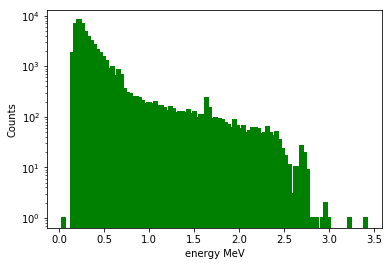

In [35]:
plt.hist(summary.evt_energy[~summary.evt_out_of_map], label='no cut',  color='green',
         bins=100, histtype='step', stacked=True, fill=True, linewidth=2.0);
plt.yscale('log')
plt.xlabel('energy MeV')
plt.ylabel('Counts')

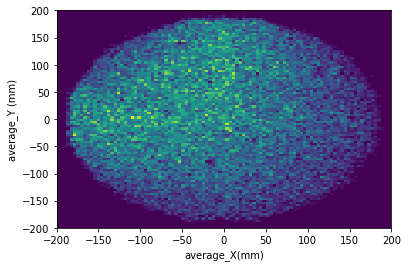

In [82]:
plt.hist2d(summary[~summary.evt_out_of_map].evt_x_avg, summary[~summary.evt_out_of_map].evt_y_avg, bins = np.linspace(-200, 200, 100));
plt.xlabel('average_X(mm)')
plt.ylabel('average_Y (mm)')
plt.hist2d(summary[~summary.evt_out_of_map].evt_x_avg, summary[~summary.evt_out_of_map].evt_y_avg, bins = np.linspace(-200, 200, 100));


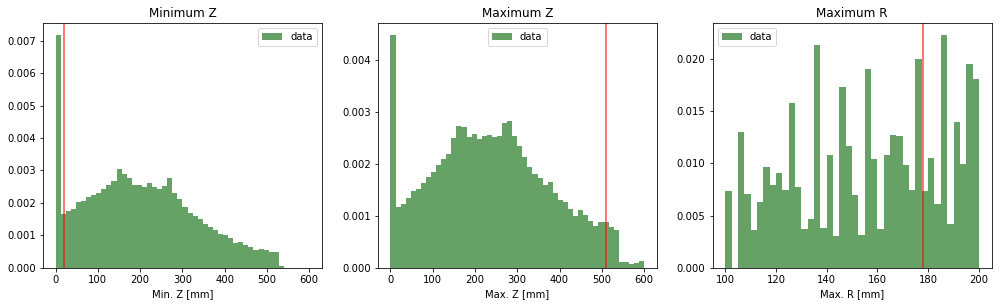

In [90]:
plt.figure(figsize=(17, 4.5));
plt.subplot(1,3,1);
plt.hist(summary[~summary.evt_out_of_map].evt_z_min, 50, (0, 600), density=1, label='data', alpha=0.6, color='darkgreen');
plt.legend();
plt.axvline(x=20, color='red', alpha=0.7);
plt.title('Minimum Z');
plt.xlabel('Min. Z [mm]');
plt.subplot(1,3,2);
plt.hist(summary[~summary.evt_out_of_map].evt_z_max, 50, (0, 600), density=1, label='data', alpha=0.6, color='darkgreen');
plt.legend();
plt.axvline(x=510, color='red', alpha=0.7);
plt.title('Maximum Z');
plt.xlabel('Max. Z [mm]');
plt.subplot(1,3,3);
plt.hist(summary[~summary.evt_out_of_map].evt_r_max, 40, (100, 200), density=1, label='data', alpha=0.6, color='darkgreen');
plt.legend();
plt.axvline(x=178, color='red', alpha=0.7);
plt.title('Maximum R');
plt.xlabel('Max. R [mm]');

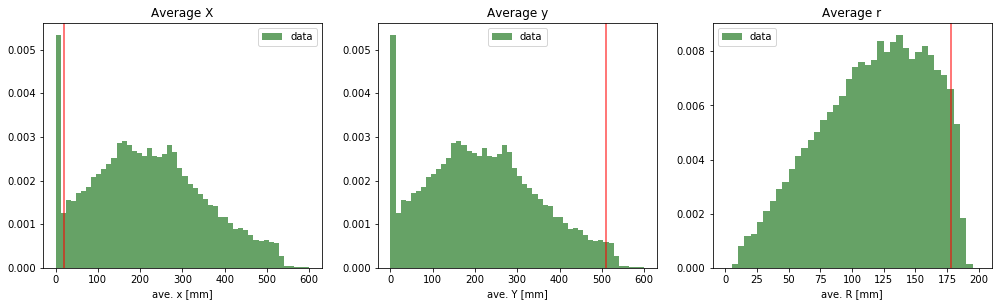

In [91]:
plt.figure(figsize=(17, 4.5));
plt.subplot(1,3,1);
plt.hist(summary[~summary.evt_out_of_map].evt_z_avg, 50, (0, 600), density=1, label='data', alpha=0.6, color='darkgreen');
plt.legend();
plt.axvline(x=20, color='red', alpha=0.7);
plt.legend();
plt.title('Average X');
plt.xlabel('ave. x [mm]');
plt.subplot(1,3,2);
plt.hist(summary[~summary.evt_out_of_map].evt_z_avg, 50, (0, 600), density=1, label='data', alpha=0.6, color='darkgreen');
plt.legend();
plt.axvline(x=510, color='red', alpha=0.7);
plt.title('Average y');
plt.xlabel('ave. Y [mm]');
plt.subplot(1,3,3);
plt.hist(summary[~summary.evt_out_of_map].evt_r_avg, 40, (0, 200), density=1, label='data', alpha=0.6, color='darkgreen');
plt.legend();
plt.axvline(x=178, color='red', alpha=0.7);
plt.legend(loc='upper left');
plt.title('Average r');
plt.xlabel('ave. R [mm]');

# Tracking/Tracks : all variables related to tracks

In [92]:
tracks.columns

Index(['event', 'trackID', 'energy', 'length', 'numb_of_voxels',
       'numb_of_hits', 'numb_of_tracks', 'x_min', 'y_min', 'z_min', 'r_min',
       'x_max', 'y_max', 'z_max', 'r_max', 'x_ave', 'y_ave', 'z_ave', 'r_ave',
       'extreme1_x', 'extreme1_y', 'extreme1_z', 'extreme2_x', 'extreme2_y',
       'extreme2_z', 'blob1_x', 'blob1_y', 'blob1_z', 'blob2_x', 'blob2_y',
       'blob2_z', 'eblob1', 'eblob2', 'ovlp_blob_energy', 'vox_size_x',
       'vox_size_y', 'vox_size_z'],
      dtype='object')

In [99]:
tracks.head().T

,0,1,2,3,4
event,4.000000,12.000000,26.000000,28.000000,28.000000
trackID,0.000000,0.000000,0.000000,0.000000,1.000000
energy,0.281042,0.348243,0.431790,0.170171,0.029421
length,18.027756,21.213203,33.402658,18.856181,0.000000
numb_of_voxels,4.000000,4.000000,6.000000,4.000000,1.000000
numb_of_hits,34.000000,33.000000,39.000000,14.000000,2.000000
numb_of_tracks,1.000000,1.000000,1.000000,2.000000,2.000000
x_min,-65.000000,55.000000,65.000000,-115.000000,-135.000000
y_min,-75.000000,35.000000,-5.000000,-5.000000,-65.000000
z_min,84.022618,56.084065,119.731340,144.342632,122.946151


In [134]:
#lets check that energy in summary is equal to the sum of track energies 
event_energy_from_track = tracks.groupby('event').agg({'energy':np.sum})
aux_df = summary[['event', 'evt_energy', 'evt_out_of_map']].merge(event_energy_from_track, on='event', how='outer')

In [117]:
np.testing.assert_allclose(aux_df[~aux_df.evt_out_of_map].evt_energy, aux_df[~aux_df.evt_out_of_map].energy)

### In tracks all variables are finite because we dont take into account out-of-map hits when calculating tracks!

In [118]:
all(np.isfinite(event_energy_from_track.energy))

True

# CHITS/Events : inclusive list of hits above charge threshold


In [121]:
hits.head().T

,0,1,2,3,4
event,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
time,1.542725e+09,1.542725e+09,1.542725e+09,1.542725e+09,1.542725e+09
npeak,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Xpeak,-5.280309e+01,-5.280309e+01,-5.280309e+01,-5.280309e+01,-5.280309e+01
Ypeak,-5.754529e+01,-5.754529e+01,-5.754529e+01,-5.754529e+01,-5.754529e+01
nsipm,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
X,-6.500000e+01,-6.500000e+01,-6.500000e+01,-6.500000e+01,-6.500000e+01
Y,-6.500000e+01,-6.500000e+01,-6.500000e+01,-6.500000e+01,-6.500000e+01
Xrms,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Yrms,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


### Ep is the energy used for track reconstruction; it differes from Ec because the drop_end_point voxel algorithm is applied

In [129]:
event_energies_from_hits = hits.groupby('event', as_index=False).agg({'Ep':sum, 'Ec':sum}) #note that pandas will calculate np.nansum by defalult_

In [130]:
#test that sum of Ep is the same as sum Ec
np.testing.assert_allclose(event_energies_from_hits.Ep, event_energies_from_hits.Ec)

In [136]:
aux_df = aux_df.merge(event_energies_from_hits, on ='event')
np.testing.assert_allclose(aux_df[~aux_df.evt_out_of_map].evt_energy, aux_df[~aux_df.evt_out_of_map].Ep )

In [145]:
event_energies_from_hits_nan = hits.groupby('event', sort=False).Ec.apply(pd.Series.sum, skipna=False).reset_index()
event_energies_from_hits_nan.columns = ['event', 'Ecnan']
aux_df = aux_df.merge(event_energies_from_hits_nan, on ='event')
np.testing.assert_array_almost_equal(aux_df.evt_out_of_map, np.isnan(aux_df.Ecnan))

## Some useful(?) plotting functions

In [191]:
def bounding_box(hits : pd.DataFrame, bounding_box_centre) :                                       
    """Returns two arrays defining the coordinates of a box that bounds the voxels"""              
    posns = hits[['X','Y','Z']]                                                                    
    mins  = np.min(posns)                                                                          
    maxs  = np.max(posns)                                                                          
    max_dist = np.max([np.abs(bounding_box_centre-mins),np.abs(bounding_box_centre-maxs)], axis=0) 
    return bounding_box_centre - max_dist, bounding_box_centre + max_dist  

def voxelize_hits_per_ev(hits             : pd.DataFrame,
                         voxel_dimensions : np.ndarray,
                         strict_voxel_size: bool = False,
                         en_v_type = 'Ec') -> np.ndarray:
    bounding_box_centre = np.sum(hits[['X','Y','Z']].transpose()*hits[en_v_type]/np.sum(hits[en_v_type]), axis=1)
    hlo, hhi = bounding_box(hits, bounding_box_centre)
    bounding_box_size   =  hhi - hlo
    number_of_voxels = np.ceil(bounding_box_size / voxel_dimensions).astype(int)
    number_of_voxels = np.clip(number_of_voxels, a_min=1, a_max=None)
    half_range = number_of_voxels * voxel_dimensions / 2
    voxel_edges_lo = bounding_box_centre - half_range
    voxel_edges_hi = bounding_box_centre + half_range
    eps = 3e-12
    voxel_edges_lo -= eps
    voxel_edges_hi += eps
    hit_positions = np.array(hits[['X','Y','Z']], dtype='float64')
    hit_energies  =          hits[en_v_type]
    E, edges = np.histogramdd(hit_positions,
                              bins    = number_of_voxels,
                              range   = tuple(zip(voxel_edges_lo, voxel_edges_hi)),
                              weights = hit_energies)
    return E

def fit_data_to_size(data, size):                                                                                                             
    pad_b   = np.max([[0,0,0],((size-np.array(data.shape))/2)]).astype('int')                    
    pad_a   = np.max([[0,0,0],(size-np.array(data.shape))-pad_b]).astype('int')                  
    padded  = np.pad(data,np.column_stack([pad_b,pad_a]), mode='constant')                       
    crop_b  = ((np.array(padded.shape)-size)/2).astype('int')                                      
    crop_a  = size+crop_b                                                                          
    cropped = padded[crop_b[0]:crop_a[0],crop_b[1]:crop_a[1],crop_b[2]:crop_a[2]]                  
    return cropped

In [192]:
def plot_3d_vox(xarr, th=0, edgecolor=None):
    dim = xarr.shape
    fig = plt.figure(figsize=[15,15], frameon=False)
    gs = fig.add_gridspec(2, 40)
    ax = fig.add_subplot(gs[0, 0:16], projection = '3d')
    axcb = fig.add_subplot(gs[0, 16])
    voxels = (xarr>th)
    norm = mpl.colors.Normalize(vmin=xarr.min(), vmax=xarr.max())
    cmap = mpl.cm.jet
    m = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    colors = np.empty(((xarr.shape[0], xarr.shape[1], xarr.shape[2], 4)))
    nonzero = np.nonzero(xarr)
    for i,j,k in zip(*nonzero):
        colors[i,j,k] = m.to_rgba(xarr[i,j,k])
    ax.voxels(voxels, facecolors = colors, edgecolor = edgecolor)
    cb1 = mpl.colorbar.ColorbarBase(axcb, cmap = cmap, norm = norm, orientation = 'vertical')
    
    ax.set_aspect(1.0)
    plt.show()
    
def plot_3d_hits(hits, energy='Ec'):
    fig = plt.figure(figsize=[15,15], frameon=False)
    gs = fig.add_gridspec(2, 40)
    ax = fig.add_subplot(gs[0, 0:16], projection = '3d')
    axcb = fig.add_subplot(gs[0, 16])
    norm = mpl.colors.Normalize(vmin=hits[energy].min(), vmax=hits[energy].max())
    cmap = mpl.cm.jet
    m = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    colors = list(map(m.to_rgba, hits[energy]))
    ax.scatter(hits['X'], hits['Y'], hits['Z'], c=colors, marker='o')
    cb1 = mpl.colorbar.ColorbarBase(axcb, cmap = cmap, norm = norm, orientation = 'vertical')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()

In [208]:
event_list = summary[(summary.evt_ntrks==1) & (summary.evt_energy>1)].event.unique()

In [233]:
event = np.random.choice(event_list)
hits_ev = hits[hits.event == event]
tracks_ev = tracks[tracks.event == event]

In [235]:
voxels = voxelize_hits_per_ev(hits_ev.dropna(),tracks_ev[['vox_size_x','vox_size_y', 'vox_size_z']].values[0], en_v_type = 'Ep')

voxels_pad = fit_data_to_size(voxels, np.array([max(voxels.shape)]*3))

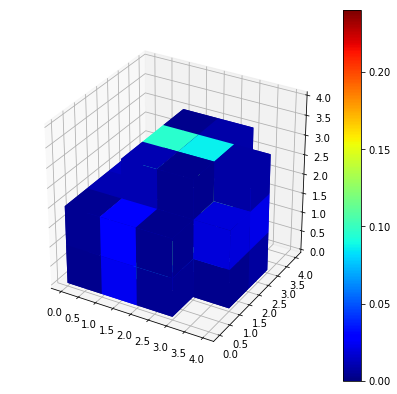

In [236]:
plot_3d_vox(voxels_pad)

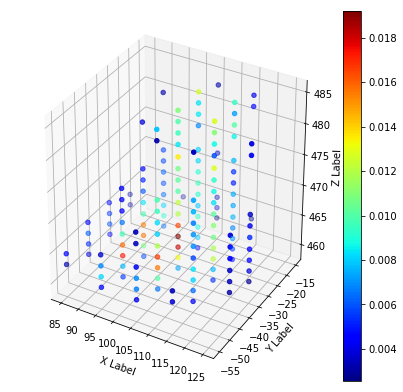

In [237]:
plot_3d_hits(hits_ev.dropna(), energy='Ep')

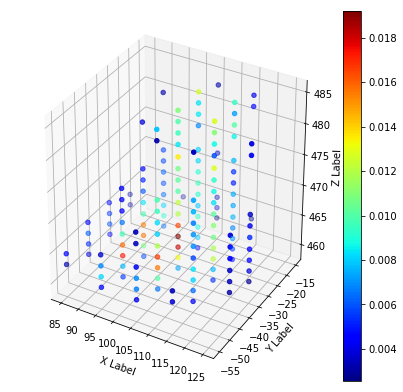

In [238]:
plot_3d_hits(hits_ev.dropna(), energy='Ec')